## Loan Default Risk EDA

In [2]:
## importing liabary
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [11]:
import pandas as pd

important_cols = ['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'DAYS_BIRTH']

app_df = pd.read_csv("application_data.csv", usecols=important_cols)

print("Loaded important columns:", app_df.shape)
print(app_df.head())


Loaded important columns: (307511, 7)
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  AMT_INCOME_TOTAL  \
0      100002       1         Cash loans           M          202500.0   
1      100003       0         Cash loans           F          270000.0   
2      100004       0    Revolving loans           M           67500.0   
3      100006       0         Cash loans           F          135000.0   
4      100007       0         Cash loans           M          121500.0   

   AMT_CREDIT  DAYS_BIRTH  
0    406597.5       -9461  
1   1293502.5      -16765  
2    135000.0      -19046  
3    312682.5      -19005  
4    513000.0      -19932  


In [12]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH
0,100002,1,Cash loans,M,202500.0,406597.5,-9461
1,100003,0,Cash loans,F,270000.0,1293502.5,-16765
2,100004,0,Revolving loans,M,67500.0,135000.0,-19046
3,100006,0,Cash loans,F,135000.0,312682.5,-19005
4,100007,0,Cash loans,M,121500.0,513000.0,-19932


In [13]:
#  1: Load important columns from application_data.csv (you already did this)
important_cols = ['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'DAYS_BIRTH']
app_df = pd.read_csv("application_data.csv", usecols=important_cols)

# Load and aggregate previous_application.csv in chunks for memory efficiency
cols_prev = ['SK_ID_CURR', 'AMT_APPLICATION', 'AMT_CREDIT', 'NAME_CONTRACT_TYPE']
agg_list = []

chunks = pd.read_csv("previous_application.csv", usecols=cols_prev, chunksize=500000)

for i, chunk in enumerate(chunks):
    print(f"Processing chunk {i+1}")
    agg_chunk = chunk.groupby('SK_ID_CURR').agg({
        'AMT_APPLICATION': 'mean',
        'AMT_CREDIT': 'mean',
        'NAME_CONTRACT_TYPE': 'count'
    })
    agg_list.append(agg_chunk)

prev_agg = pd.concat(agg_list)
prev_agg = prev_agg.groupby(prev_agg.index).mean().reset_index()

# Rename columns in aggregated data
prev_agg.columns = [
    'SK_ID_CURR',
    'PREV_AMT_APPLICATION_MEAN',
    'PREV_AMT_CREDIT_MEAN',
    'NUM_PREV_LOANS'
]

# Step 4: Merge aggregated previous loan data with main application data
combined_df = app_df.merge(prev_agg, on='SK_ID_CURR', how='left')

print("Combined data shape:", combined_df.shape)
print(combined_df.head())


Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Combined data shape: (307511, 10)
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  AMT_INCOME_TOTAL  \
0      100002       1         Cash loans           M          202500.0   
1      100003       0         Cash loans           F          270000.0   
2      100004       0    Revolving loans           M           67500.0   
3      100006       0         Cash loans           F          135000.0   
4      100007       0         Cash loans           M          121500.0   

   AMT_CREDIT  DAYS_BIRTH  PREV_AMT_APPLICATION_MEAN  PREV_AMT_CREDIT_MEAN  \
0    406597.5       -9461                 179055.000             179055.00   
1   1293502.5      -16765                 551577.375             622113.75   
2    135000.0      -19046                  24282.000              20106.00   
3    312682.5      -19005                 345339.945             369047.25   
4    513000.0      -19932                 177853.500   

In [14]:
combined_df.shape

(307511, 10)

In [15]:
combined_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MEAN,NUM_PREV_LOANS
0,100002,1,Cash loans,M,202500.0,406597.5,-9461,179055.000,179055.00,1.00
1,100003,0,Cash loans,F,270000.0,1293502.5,-16765,551577.375,622113.75,1.50
2,100004,0,Revolving loans,M,67500.0,135000.0,-19046,24282.000,20106.00,1.00
3,100006,0,Cash loans,F,135000.0,312682.5,-19005,345339.945,369047.25,2.25
4,100007,0,Cash loans,M,121500.0,513000.0,-19932,177853.500,197845.50,2.00


In [17]:
## checking null value
combined_df.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
DAYS_BIRTH                       0
PREV_AMT_APPLICATION_MEAN    16454
PREV_AMT_CREDIT_MEAN         16454
NUM_PREV_LOANS               16454
dtype: int64

In [19]:
## Fill missing values with zero
combined_df['PREV_AMT_APPLICATION_MEAN'].fillna(0, inplace=True)
combined_df['PREV_AMT_CREDIT_MEAN'].fillna(0, inplace=True)
combined_df['NUM_PREV_LOANS'].fillna(0, inplace=True)

In [22]:
## Keep missing and add a flag
combined_df['HAS_PREV_LOANS'] = combined_df['NUM_PREV_LOANS'].notnull().astype(int)
combined_df.fillna(0, inplace=True)


In [23]:
combined_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MEAN,NUM_PREV_LOANS,HAS_PREV_LOANS
0,100002,1,Cash loans,M,202500.0,406597.5,-9461,179055.000,179055.00,1.00,1
1,100003,0,Cash loans,F,270000.0,1293502.5,-16765,551577.375,622113.75,1.50,1
2,100004,0,Revolving loans,M,67500.0,135000.0,-19046,24282.000,20106.00,1.00,1
3,100006,0,Cash loans,F,135000.0,312682.5,-19005,345339.945,369047.25,2.25,1
4,100007,0,Cash loans,M,121500.0,513000.0,-19932,177853.500,197845.50,2.00,1


In [24]:
## data information
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SK_ID_CURR                 307511 non-null  int64  
 1   TARGET                     307511 non-null  int64  
 2   NAME_CONTRACT_TYPE         307511 non-null  object 
 3   CODE_GENDER                307511 non-null  object 
 4   AMT_INCOME_TOTAL           307511 non-null  float64
 5   AMT_CREDIT                 307511 non-null  float64
 6   DAYS_BIRTH                 307511 non-null  int64  
 7   PREV_AMT_APPLICATION_MEAN  307511 non-null  float64
 8   PREV_AMT_CREDIT_MEAN       307511 non-null  float64
 9   NUM_PREV_LOANS             307511 non-null  float64
 10  HAS_PREV_LOANS             307511 non-null  int32  
dtypes: float64(5), int32(1), int64(3), object(2)
memory usage: 27.0+ MB


In [25]:
## statatics test
combined_df.describe()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MEAN,NUM_PREV_LOANS,HAS_PREV_LOANS
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,3.075110e+05,307511.000000,307511.0
mean,278180.518577,0.080729,1.687979e+05,5.990260e+05,-16036.995067,1.458969e+05,1.611165e+05,1.730130,1.0
std,102790.175348,0.272419,2.371231e+05,4.024908e+05,4363.988632,1.577243e+05,1.707948e+05,1.052643,0.0
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,-25229.000000,0.000000e+00,0.000000e+00,0.000000,1.0
25%,189145.500000,0.000000,1.125000e+05,2.700000e+05,-19682.000000,5.399035e+04,5.817600e+04,1.000000,1.0
50%,278202.000000,0.000000,1.471500e+05,5.135310e+05,-15750.000000,9.839250e+04,1.086270e+05,1.500000,1.0
75%,367142.500000,0.000000,2.025000e+05,8.086500e+05,-12413.000000,1.802078e+05,2.044988e+05,2.000000,1.0
max,456255.000000,1.000000,1.170000e+08,4.050000e+06,-7489.000000,4.050000e+06,4.050000e+06,18.250000,1.0


In [26]:
## checking data balacnce
combined_df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [41]:
#combined_df.to_csv("combined_cleaned_data.csv", index=False)

In [27]:
# Analyze Target Variable Distribution

0    282686
1     24825
Name: TARGET, dtype: int64
0    0.919271
1    0.080729
Name: TARGET, dtype: float64


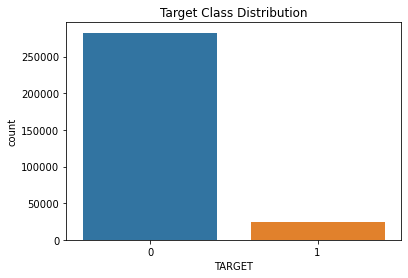

In [28]:
print(combined_df['TARGET'].value_counts())
print(combined_df['TARGET'].value_counts(normalize=True))

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='TARGET', data=combined_df)
plt.title('Target Class Distribution')
plt.show()


In [29]:
# Univariate Analysis of Numerical Features

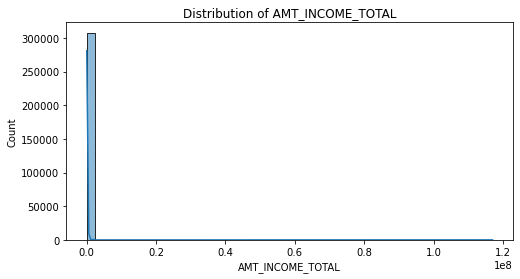

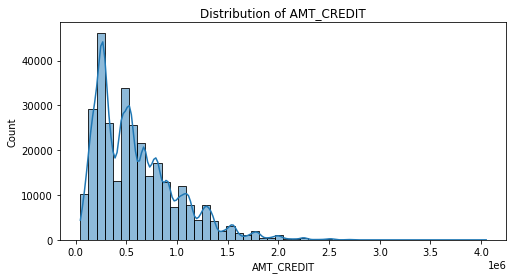

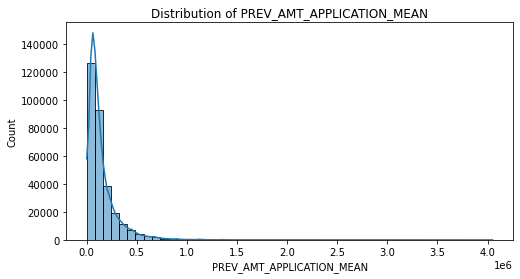

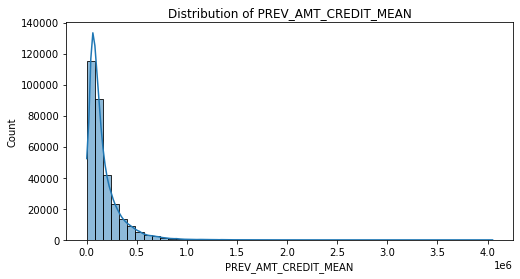

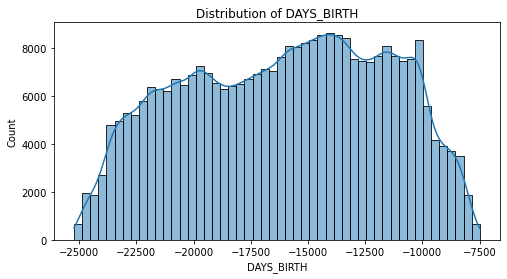

In [30]:
numeric_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'PREV_AMT_APPLICATION_MEAN', 'PREV_AMT_CREDIT_MEAN', 'DAYS_BIRTH']

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(combined_df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [31]:
# Univariate Analysis of Categorical Features

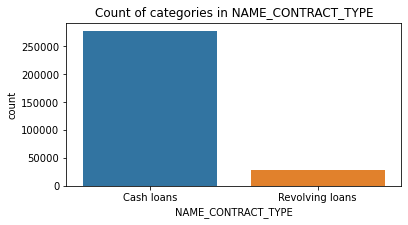

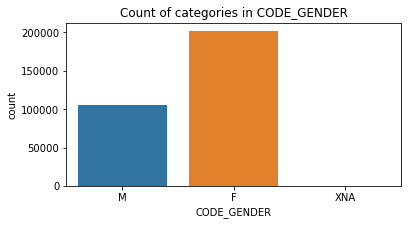

In [32]:
categorical_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER']

for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=combined_df)
    plt.title(f'Count of categories in {col}')
    plt.show()


In [33]:
# Bivariate Analysis – Features vs Target

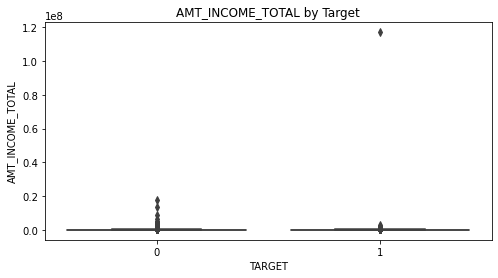

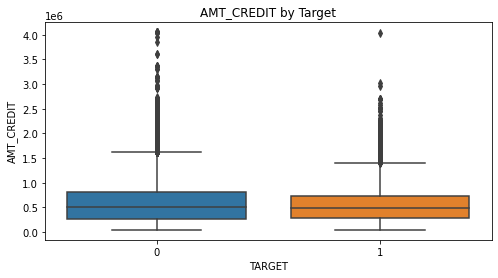

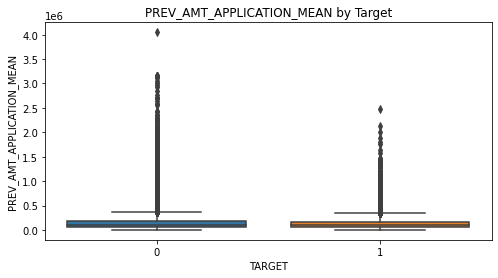

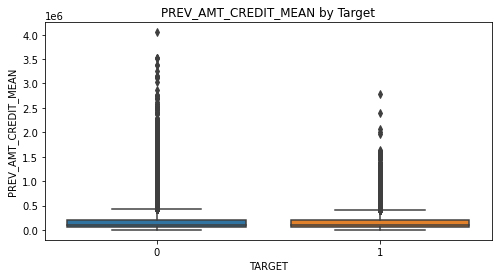

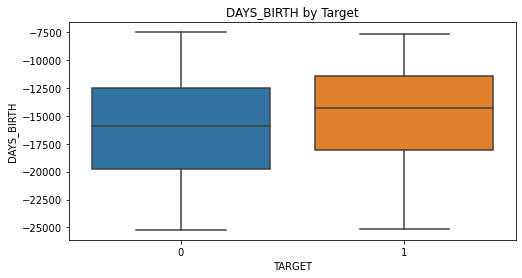

In [34]:
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='TARGET', y=col, data=combined_df)
    plt.title(f'{col} by Target')
    plt.show()


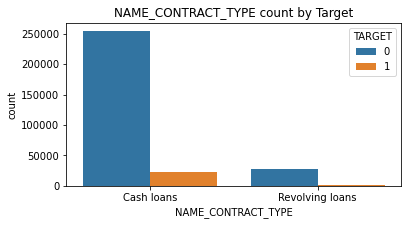

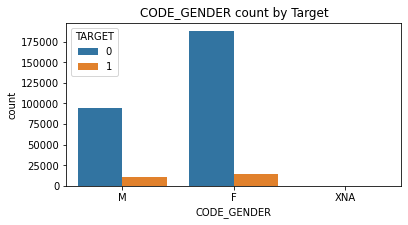

In [35]:
for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue='TARGET', data=combined_df)
    plt.title(f'{col} count by Target')
    plt.show()


In [36]:
# Correlation Analysis

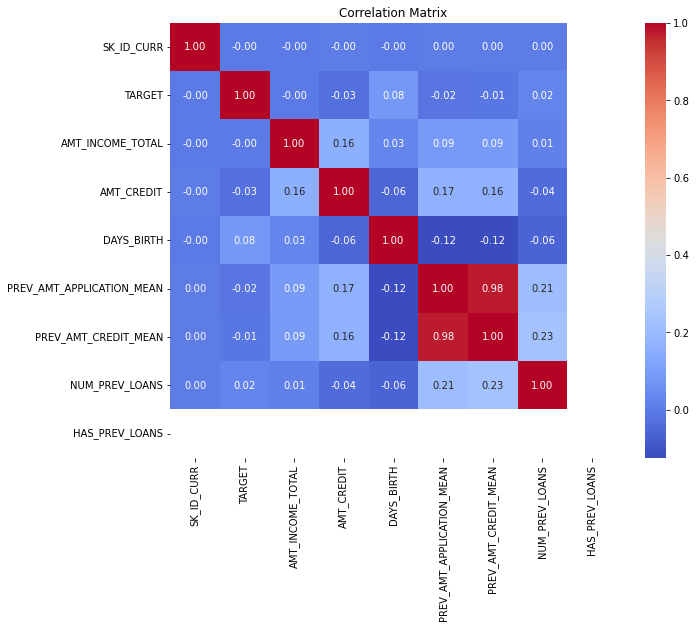

In [37]:
corr = combined_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [38]:
print(corr['TARGET'].sort_values(ascending=False))


TARGET                       1.000000
DAYS_BIRTH                   0.078239
NUM_PREV_LOANS               0.024125
SK_ID_CURR                  -0.002108
AMT_INCOME_TOTAL            -0.003982
PREV_AMT_CREDIT_MEAN        -0.010053
PREV_AMT_APPLICATION_MEAN   -0.015488
AMT_CREDIT                  -0.030369
HAS_PREV_LOANS                    NaN
Name: TARGET, dtype: float64


In [39]:
# Outlier Detection

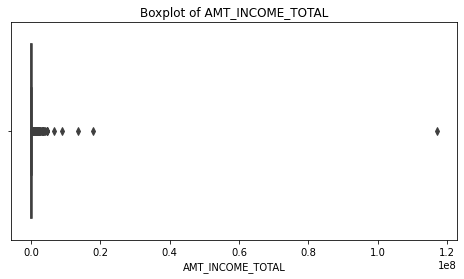

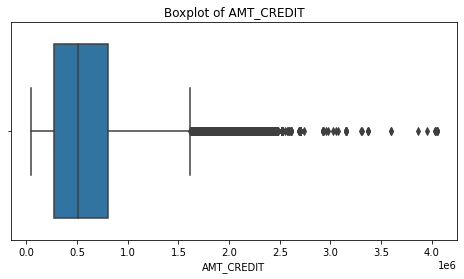

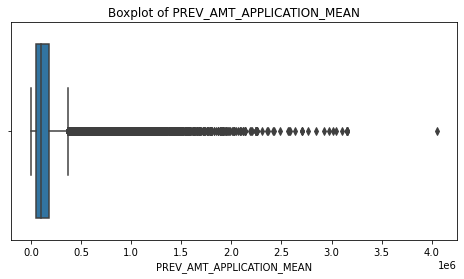

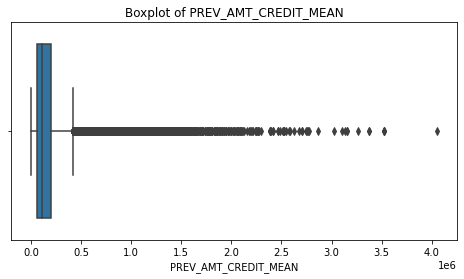

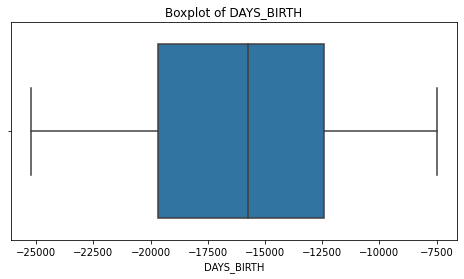

In [40]:
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=combined_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
